# Getting Data

In [4]:
import pandas as pd
import datetime as dt
from datetime import date
import pandas_datareader.data as web
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
import seaborn as sns
import numpy as np

Requirement already up-to-date: yfinance in /usr/local/lib/python3.7/dist-packages (0.1.59)


In [5]:
tickers=["^BVSP","hgbs11.SA"]
carteira= web.get_data_yahoo(tickers,start="2017-01-01")["Close"]
carteira=carteira.resample("M").sum()
carteira=carteira.pct_change()
carteira=carteira.dropna()
carteira = carteira.replace([np.inf, -np.inf], np.NaN)
carteira.columns=["Ibovespa","FII"]
carteira.head()

,Ibovespa,FII
Date,,
2017-02-28,-0.103585,-0.077843
2017-03-31,0.250540,0.332600
2017-04-30,-0.224122,-0.269791
2017-05-31,0.234510,0.217764
2017-06-30,-0.090908,0.011705


# Beta

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fda731a23d0>,
      dtype=object)

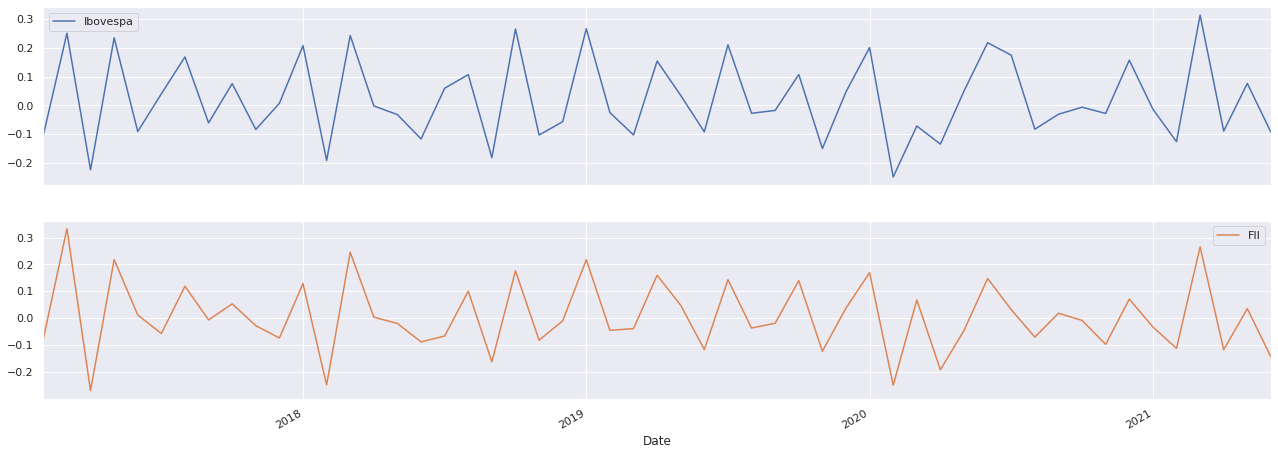

In [6]:
sns.set()
carteira.plot(subplots=True, figsize=(22,8))

In [7]:
correl=carteira.corr() # correl["FII"][0]
correl=correl["FII"][0]
DesvioIBOV=(carteira["Ibovespa"].std())
DesvioFII=(carteira["FII"].std())
Covariance = correl*DesvioIBOV*DesvioFII
Variance = DesvioIBOV*DesvioIBOV
print(Covariance/Variance)


0.8595760216397995
